<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/01_Supervised-%20Machine%20Learning/01_Linear_Regression/House_price_prediction/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

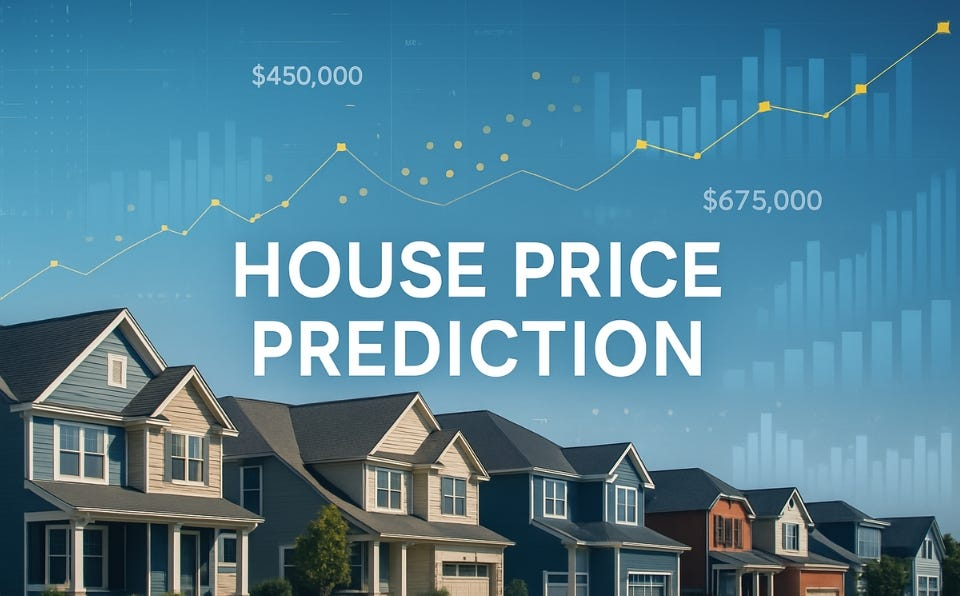

#**House Price Prediction using Machine Learning**

**📘 Project Overview**

This project aims to build a machine learning model that accurately predicts house prices based on key property features such as area, number of bedrooms, bathrooms, floors, garage availability, location, and year built. The goal is to help estimate real estate prices using data-driven insights.

#Using LinearRegression and RandomForestRegressor

**Data Loading & Cleaning**

In [23]:

from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/house_price_main.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [24]:
df["Location"].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

**Feature Engineering:** The "Area" column is renamed to "Area(sqft)" for clarity.

In [25]:
df = df.rename(columns={"Area":"Area(sqft)"})


#Categorical data (Location) is transformed using one-hot encoding.
df["Garage"] = df["Garage"].map({"Yes":1, "No":0})
df = pd.get_dummies(df, drop_first=True, columns=["Location","Condition"], dtype=int)

#dropping Irrelevant column
df = df.drop(columns=["Id"])

#Removing 5% Outliers from the price features
Q1 = df["Price"].quantile(0.05)
Q3 = df["Price"].quantile(0.95)
df = df[(df["Price"] >= Q1) & (df["Price"] <= Q3)]

abs(df.corr(numeric_only=True)["Price"]).sort_values(ascending=False)

,Price
Price,1.000000
Floors,0.056259
Location_Suburban,0.048433
Condition_Fair,0.044683
Condition_Poor,0.040328
Location_Urban,0.020832
Condition_Good,0.020238
Garage,0.017976
Area(sqft),0.014183
Location_Rural,0.011887


**Separating feature variables to target variable**

In [26]:
x = df.drop(columns=["Price"])
y = df["Price"]

**Model Preparation:** The dataset is split into training and testing sets to evaluate performance.

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Features are normalized using MinMaxScaler to improve model learning.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

**Model Building:** Two models are tested
Linear Regression – for simple linear relationships.

Random Forest Regressor – a more powerful ensemble model that captures complex patterns.

In [28]:
#Linear Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.score(x_train, y_train)

0.007948826734152203

**LinearRegression Model Score**

In [29]:
lin_reg.score(x_train, y_train)

0.007948826734152203

In [30]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
                    )
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, random_state=42)

**RandomForestRegressor Model Score**

In [31]:
print("Train Score:", rf.score(x_train, y_train))
print("Test Score:", rf.score(x_test, y_test))

Train Score: 0.6911514496617774
Test Score: -0.02367042138547082


In [32]:
lin_reg.predict(x_test[:10])

array([532283.31418237, 560822.5109754 , 515504.2426202 , 527878.70412189,
       549349.38814164, 535756.2459901 , 513434.64232364, 517612.81843576,
       536091.73316917, 547121.51785141])

#**📊 Result**
A well-trained Random Forest Regression model capable of predicting house prices with strong accuracy and generalization performance.

#**🧰 Tools & Libraries Used:**
Python

Pandas, NumPy for data handling

Scikit-learn for preprocessing and model training

Google Colab for running and testing the notebook